In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from scipy.optimize import linear_sum_assignment
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.tree import plot_tree
%matplotlib inline

rnd_state = 42

In [2]:
# Loading the data file

url = 'horse-colic.csv'
df = pd.read_csv(url,sep=',',header=None)

In [3]:
# renaming the columns starting from 1
renamed_columns = []

for i in range(1,29):
    renamed_columns.append(i)

df.columns =  renamed_columns   

In [4]:
# After renaming the columns the dataframe
df

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,?,120,70,4,?,4,2,...,55,65,?,?,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,?,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,?,?,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


In [5]:
# replaced special charaters with NaN
df = df.replace('?', np.nan)

# After replaing "?" with Nan
df

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,2,1,530101,38.50,66,28,3,3,NaN,2,...,45.00,8.40,NaN,NaN,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,NaN,NaN,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,NaN,NaN,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,NaN,NaN,6,2,...,74.00,7.40,NaN,NaN,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,NaN,120,70,4,NaN,4,2,...,55,65,NaN,NaN,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,NaN,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,NaN,NaN,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


In [6]:
# getting the count of Null values in dataframe
count = df.isna().sum().sum()
print(count)

1605


In [7]:
# Removing columns 3, 25, 26, 27, 28.
df = df.drop([3, 25, 26, 27, 28], axis=1)

#After droppiong the specified columns
df

,1,2,4,5,6,7,8,9,10,11,...,15,16,17,18,19,20,21,22,23,24
0,2,1,38.50,66,28,3,3,NaN,2,5,...,NaN,NaN,3,5,45.00,8.40,NaN,NaN,2,2
1,1,1,39.2,88,20,NaN,NaN,4,1,3,...,NaN,NaN,4,2,50,85,2,2,3,2
2,2,1,38.30,40,24,1,1,3,1,3,...,NaN,NaN,1,1,33.00,6.70,NaN,NaN,1,2
3,1,9,39.10,164,84,4,1,6,2,2,...,2,5.00,3,NaN,48.00,7.20,3,5.30,2,1
4,2,1,37.30,104,35,NaN,NaN,6,2,NaN,...,NaN,NaN,NaN,NaN,74.00,7.40,NaN,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,NaN,120,70,4,NaN,4,2,2,...,NaN,NaN,NaN,5,55,65,NaN,NaN,3,2
296,2,1,37.20,72,24,3,2,4,2,4,...,1,NaN,4,4,44.00,NaN,3,3.30,3,1
297,1,1,37.50,72,30,4,3,4,1,4,...,1,NaN,3,5,60.00,6.80,NaN,NaN,2,1
298,1,1,36.50,100,24,3,3,3,1,3,...,1,NaN,4,4,50.00,6.00,3,3.40,1,1


In [8]:
X = df.drop(23,axis=1)

# Target column
y = df[23]

X.shape

(300, 22)

In [9]:
# droppong the rows in X which contains Nan
X_copy1 = X.copy()  # making a copy as after dropping number of row in X will mismatch with Imputed y

X1=X.dropna()

#After dropping rows containing Nan
print(X1)

print(X_copy1.shape)

    1   2      4    5   6  7  8  9  10 11  ... 14 15    16 17 18     19    20  \
10   1   1  38.10   66  12  3  3  5  1  3  ...  2  1  3.00  2  5  44.00  6.00   
54   2   1  40.30  114  36  3  3  1  2  2  ...  2  1  7.00  1  5  57.00  8.10   
64   1   1  39.00   64  36  3  1  4  2  3  ...  1  2  7.00  4  5  44.00  7.50   
91   2   1  40.30  114  36  3  3  1  2  2  ...  2  1  7.00  1  5  57.00  8.10   
104  1   1  37.80   52  24  1  3  3  1  4  ...  2  3  5.70  2  5  48.00  6.60   
189  1   1  38.30   60  16  3  1  1  1  2  ...  2  2  3.00  1  4  30.00  6.00   

    21    22 24  
10   2  3.60  1  
54   3  4.50  1  
64   3  5.00  1  
91   3  4.50  1  
104  1  3.70  1  
189  1  3.00  1  

[6 rows x 22 columns]
(300, 22)


In [10]:
y.shape

(300,)

In [11]:
from sklearn.impute import SimpleImputer

#Impute the nulls on the predicting column (i.e. y) using the column means

imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')
y=np.array(y).reshape(-1,1)
imputer = imputer.fit(y)
y = imputer.transform(y)

#After imputing column y
y

array([[2.        ],
       [3.        ],
       [1.        ],
       [2.        ],
       [2.        ],
       [1.        ],
       [1.        ],
       [2.        ],
       [3.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [2.        ],
       [1.        ],
       [2.        ],
       [2.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [2.        ],
       [1.        ],
       [2.        ],
       [3.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [3.        ],
       [3.        ],
       [1.        ],
       [1.        ],
       [2.        ],
       [2.        ],
       [1.        ],
       [1.        ],
       [3.        ],
       [3.        ],
       [2.        ],
       [1.        ],
       [1.   

In [12]:
imputer1 = imputer.fit(X_copy1)

X_copy1 = imputer1.transform(X_copy1)

X_copy1.shape

(300, 22)

In [13]:
ts = 0.3

X_train, X_test, y_train, y_test = train_test_split(
    X_copy1, y, test_size=ts, random_state=rnd_state)
print("Training on %d examples" % len(X_train))

Training on 210 examples


In [18]:
y = pd.DataFrame(y)

y = (y).astype(int)

Tune Model 1

In [19]:
score = 'accuracy'
cv = 5 #number of split for cross validation
model1_param = {'criterion':['gini', 'entropy'], 'max_depth':list(range(1,10)), 'min_samples_split': range(2,10)}
model1_est = DecisionTreeClassifier(random_state=rnd_state)


model1 = GridSearchCV(model1_est, model1_param, scoring=score, cv=5) 
model1.fit(X_copy1,y)

print("The best found hyperparameters are: {}".format(model1.best_params_))
print("The corresponding {} on validation is: {}".format(score, model1.best_score_*100))

The best found hyperparameters are: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 4}
The corresponding accuracy on validation is: 67.33333333333333


The accuracy on test set is 96.67%


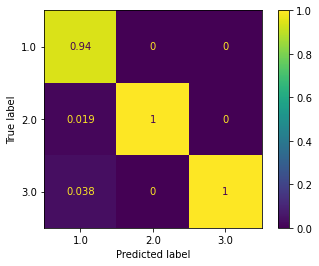

In [21]:
# Showing the Confusion matrix

ypred1 = model1.predict(X_test)
acc1 = accuracy_score(y_test, ypred1)
print("The accuracy on test set is {:.2f}%".format(acc1*100))
plot_confusion_matrix(model1, X_test, y_test, normalize='pred');

In [24]:
#Showing the F1 score
y_true, y_pred = y_test, model1.predict(X_test)
print(classification_report(y_true, ypred1))

              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97        50
         2.0       1.00      0.96      0.98        23
         3.0       1.00      0.88      0.94        17

    accuracy                           0.97        90
   macro avg       0.98      0.95      0.96        90
weighted avg       0.97      0.97      0.97        90



In [30]:
# Showing cohen_kappa_score for model1
from sklearn.metrics import cohen_kappa_score

ypred1 = model1.predict(X_test)
acc1 = cohen_kappa_score(y_test, ypred1)
print("The cohen_kappa_score on test set is {:.2f}%".format(acc1*100))

The cohen_kappa_score on test set is 94.24%


Tune Model 2

In [25]:
score = 'accuracy'
cv = 5 #number of split for cross validation
knn_param = {'weights':['distance', 'uniform'], 'n_neighbors':[3,5,7,9,11]}


model2 = GridSearchCV(KNeighborsClassifier(), knn_param, scoring=score, cv=5) 
model2.fit(X_copy1,y)

print("The best found hyperparameters are: {}".format(model2.best_params_))
print("The corresponding {} on validation is: {}".format(score, model2.best_score_))

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

The best found hyperparameters are: {'n_neighbors': 5, 'weights': 'distance'}
The corresponding accuracy on validation is: 0.6766666666666665


C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

The accuracy on test set is 100.00%


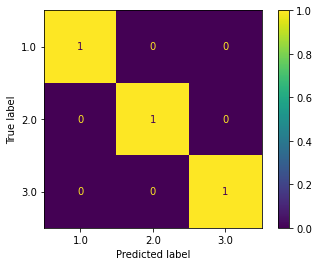

In [27]:
# Showing the Confusion matrix

ypred2 = model2.predict(X_test)
acc1 = accuracy_score(y_test, ypred2)
print("The accuracy on test set is {:.2f}%".format(acc1*100))
plot_confusion_matrix(model2, X_test, y_test, normalize='pred');

In [28]:
#Showing the F1 score
y_true, y_pred = y_test, model2.predict(X_test)
print(classification_report(y_true, ypred1))

              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97        50
         2.0       1.00      0.96      0.98        23
         3.0       1.00      0.88      0.94        17

    accuracy                           0.97        90
   macro avg       0.98      0.95      0.96        90
weighted avg       0.97      0.97      0.97        90



In [31]:
ypred1 = model2.predict(X_test)
acc1 = cohen_kappa_score(y_test, ypred1)
print("The cohen_kappa_score on test set is {:.2f}%".format(acc1*100))

The cohen_kappa_score on test set is 100.00%


Best model is model1 with accuracy score 96.67% than model2 with accuracy score 0.6766666666666665.